Validar new features

Perguntar da definição de variáveis

features colineares



transformação não linear (traçar histograma da feature e talvez colocar log → deixa mais gaussiano facilita modelo)

identificação de outliers e limites do modelo


## Conteúdos:

- ### 1.0:
    - 1.1 [Requisitos](#requisitos)
    - 1.2 [Imports](#imports)
    - 1.3 [Funções Auxiliares](#auxiliares)
    - 1.4 [Leitura dos dados](#leitura)
    - 1.5 [Lidando com dados faltantes](#faltantes)
    - 1.6 [Reatribuindo valor a variável dependente](#dependente)
    
- ### XX:
    - x.x: [Desbalanceamento de dados](#desbalanceamento)

# 1.0

<a id='requisitos'></a>
#### Pacotes Python Utilizados:

- ```pip install pandas```
- ```pip install seaborn```
- ```pip install imblearn```
- ```pip install sklearn```

#### Atualizando, caso necessário
- ```pip install -U pandas seaborn imblearn sklearn```

<a id='imports'></a>
### Imports

In [1]:
# utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# mantém a replicabilidade do notebook
RANDOM_SEED = 42

<a id='auxiliares'></a>
### Funções Auxiliares

In [2]:
def plotAttritionCount(value_counts, title, labels=['No', 'Yes']):
    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=[3,3])
    rects1 = ax.bar(x, value_counts, color=['red', 'green'])
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.plot();
    
def prettyPercentagePrint(value):
    print("{:.2%}".format(value))

<a id='leitura'></a>
### Leitura dos dados

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
description = {'Age': 'idade do funcionário', 
               'Attrition': 'perda de funcionários que uma empresa sofreu por determinados motivos',
               'BusinessTravel': 'frequência de viagens do funcionário',
               'DailyRate': '', 
               'Department': 'departamento em que o funcionário atua',
               'DistanceFromHome': 'distância do local de trabalho e de onde mora o funcionário',
               'Education': 'nível de escolaridade do funcionário',
               'EducationField': 'área em que o funcionário se formou',
               'EmployeeCount': '',
               'EmployeeNumber': 'ID do funcionário',
               'EnvironmentSatisfaction': 'satisfação com o ambiente de trabalho',
               'Gender': 'gênero do funcionário',
               'HourlyRate': '',
               'JobInvolvement': 'quanto o funcionário está envolvido no trabalho',
               'JobLevel': '',
               'JobRole': 'área na qual trabalha',
               'JobSatisfaction': 'satisfação com o trabalho',
               'MaritalStatus': 'estado civil',
               'MonthlyIncome': 'salário mensal',
               'MonthlyRate': '',
               'NumCompaniesWorked': 'número de empresas que já trabalhou',
               'Over18': 'se o funcionário tem mais de 18 anos',
               'OverTime': 'trabalhou horas extras',
               'PercentSalaryHike': 'porcentagem de variação do salário de um ano pra outro',
               'PerformanceRating': 'performance do indivíduo',
               'RelationshipSatisfaction': 'satisfação com relações entre colegas',
               'StandardHours': 'jornada de trabalho',
               'StockOptionLevel': 'nível de stocks do funcionário',
               'TotalWorkingYears': 'total de anos trabalhados',
               'TrainingTimesLastYear': 'quantidade de mentorias no ano anterior',
               'WorkLifeBalance': 'nível de balanço entre trabalho e vida pessoal',
               'YearsAtCompany': 'total de anos na empresa', 
               'YearsInCurrentRole': 'total de anos no cargo atual', 
               'YearsSinceLastPromotion': 'quantidade de anos desde a última promoção',
               'YearsWithCurrManager': 'total de anos trabalhando com o mesmo gerente'
              }

In [6]:
for i in df.columns:
    print(f"{i}: {description[i]}")

Age: idade do funcionário
Attrition: perda de funcionários que uma empresa sofreu por determinados motivos
BusinessTravel: frequência de viagens do funcionário
DailyRate: 
Department: departamento em que o funcionário atua
DistanceFromHome: distância do local de trabalho e de onde mora o funcionário
Education: nível de escolaridade do funcionário
EducationField: área em que o funcionário se formou
EmployeeCount: 
EmployeeNumber: ID do funcionário
EnvironmentSatisfaction: satisfação com o ambiente de trabalho
Gender: gênero do funcionário
HourlyRate: 
JobInvolvement: quanto o funcionário está envolvido no trabalho
JobLevel: 
JobRole: área na qual trabalha
JobSatisfaction: satisfação com o trabalho
MaritalStatus: estado civil
MonthlyIncome: salário mensal
MonthlyRate: 
NumCompaniesWorked: número de empresas que já trabalhou
Over18: se o funcionário tem mais de 18 anos
OverTime: trabalhou horas extras
PercentSalaryHike: porcentagem de variação do salário de um ano pra outro
PerformanceRat

Vale destacar que *Education*, *EnvironmentSatisfaction*, *JobInvolvement*, *JobSatisfaction*, *PerformanceRating*, *RelationshipSatisfaction* e *WorkLifeBalance* são ordinais, ou seja é possível ordená-las como números:

|   | Education     |
|---|---------------|
| 1 | Below College |
| 2 | College       | 
| 3 | Bachelor   |
| 4 | Master   | 
| 5 | Doctor   |

- Attrition: nosso alvo ("No" = 0, "Yes" = 1);
- BusinessTravel: frequência de viagens do funcionário;
- Age: idade do funcionário
- DailyRate:
- EmployeeNumber: ID único do funcionário
- EmployeeCount: 

In [7]:
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


Percebemos que algumas colunas (features para nosso futuro modelo) não variam ou são informações irrelevantes, como o ID do funcionário. Logo, iremos removê-las.

In [8]:
remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(remove, inplace=True, axis=1)

<a id='faltantes'></a>
### Lidando com dados faltantes

Na célula abaixo, verificamos se há valores faltantes. Como não há, não temos mais o que fazer nessa seção.

In [9]:
df.isna().values.any()

False

<a id='dependente'></a>
### Reatribuindo valor a variável dependente

Existem várias formas fáceis de codificar a transformação de uma váriavel binária. Abaixo está uma delas.

In [10]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
cat_variables = []
for i in df:
    if df[i].dtypes == object:
        cat_variables.append(i)
        
df_cat = pd.get_dummies(df[cat_variables], drop_first=True)

<AxesSubplot:>

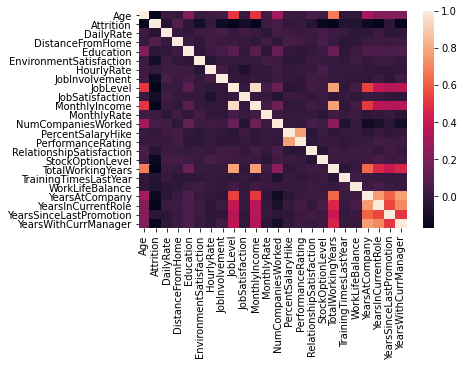

In [12]:
df_num = df.drop(cat_variables, axis=1)
sns.heatmap(df_num.corr(), xticklabels=df_num.columns, yticklabels=df_num.columns)

Analysis of correlation results (sample analysis)
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.

In [13]:
df_prepared = pd.concat([df_num, df_cat], axis=1)
df_prepared

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


<a id='desbalanceamento'></a>
### Desbalanceamento de dados

In [14]:
df_prepared['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

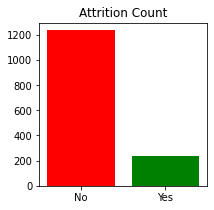

In [15]:
plotAttritionCount(df_prepared['Attrition'].value_counts(), 'Attrition Count')

Como pode ser observado acima os dados estão desbalanceados. Assim, um modelo que chuta não, aplicado nesse dataset, seria muito bom, com uma acurácia de aproximadamente 84%. 

## Método 1:

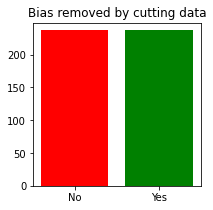

In [16]:
no_lines = df_prepared[df_prepared["Attrition"] == 0]
yes_lines = df_prepared[df_prepared["Attrition"] == 1]
no_random = no_lines.sample(frac = len(yes_lines)/len(no_lines), random_state=RANDOM_SEED)

df_prepared_bias_free = yes_lines.append(no_random)

plotAttritionCount(df_prepared_bias_free['Attrition'].value_counts(), 'Bias removed by cutting data')

### Método 1.1: Decision Tree Classifier

In [17]:
target = df_prepared_bias_free['Attrition']
df_final = df_prepared_bias_free.drop('Attrition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_final, target, test_size= 0.20, random_state=RANDOM_SEED)

In [18]:
tree_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)

tree_clf.fit(X_train, y_train)

y_pred_train = tree_clf.predict(X_train)
print('Accuracy score do modelo:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train))

Accuracy score do modelo:
100.00%


Opa... Parece que temos um classificador perfeito!!

Não é o caso, um dos erros mais comuns de se encontrar em projetos principiantes de machine learning é prever a acurácia do modelo sobre o próprio conjunto de treinamento. Estamos caindo em um caso de overfitting.

In [19]:
y_pred_train_dt = cross_val_predict(tree_clf, X_train, y_train, cv=3, n_jobs=-1)
print('Accuracy Score no set de treinamento, usando cross-validation:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train_dt))

Accuracy Score no set de treinamento, usando cross-validation:
61.74%


In [20]:
scores = cross_val_score(tree_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
print('Cross Validation Accuracy Scores:')
for i in scores:
    prettyPercentagePrint(i)

Cross Validation Accuracy Scores:
59.84%
62.70%
62.70%


In [21]:
y_test_pred = tree_clf.predict(X_test)
print('Accuracy no set de teste:')
prettyPercentagePrint(accuracy_score(y_test, y_test_pred))

Accuracy no set de teste:
64.21%


### Método 1.2: Random Forest Classifier

In [22]:
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED)

rf_clf.fit(X_train, y_train)

# caso incorreto
y_pred_train = rf_clf.predict(X_train)
print('Accuracy score com overfitting:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train))

# caso adequado
y_pred_train_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3, n_jobs=-1)
print('Accuracy Score no set de treinamento, usando cross-validation:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train_rf))

scores = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
print('Cross Validation Accuracy Scores:')
for i in scores:
    prettyPercentagePrint(i)

Accuracy score com overfitting:
100.00%
Accuracy Score no set de treinamento, usando cross-validation:
70.98%
Cross Validation Accuracy Scores:
67.72%
73.81%
71.43%


In [23]:
y_test_pred_rf = rf_clf.predict(X_test)
print('Accuracy no set de teste:')
prettyPercentagePrint(accuracy_score(y_test, y_test_pred_rf))

Accuracy no set de teste:
69.47%


## Método 2:

In [24]:
target = df_prepared['Attrition']
df_final = df_prepared.drop('Attrition', axis=1)

oversampler = SMOTE(random_state=RANDOM_SEED)

_train, _target = oversampler.fit_sample(df_final, target)

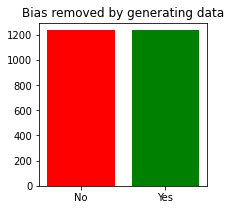

In [25]:
plotAttritionCount(_target.value_counts(), 'Bias removed by generating data')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(_train, _target, test_size= 0.20, random_state=RANDOM_SEED)

### Método 2.1: Decision Tree Classifier

In [27]:
tree_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# from sklearn.tree import export_graphviz
# from subprocess import check_call
# from IPython.display import Image  
# import pydotplus

# export_graphviz(tree_clf, out_file='attrition_tree.dot', 
#                 feature_names=df_final.columns,
#                 class_names=['No', 'Yes'])

# check_call(['dot','-Tpng','attrition_tree.dot','-o','tree1.png'])
# img = Image.open("tree1.png")
# draw = ImageDraw.Draw(img)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [29]:
y_pred_train = tree_clf.predict(X_train)
print('Accuracy score com overfitting:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train))

y_pred_train = cross_val_predict(tree_clf, X_train, y_train, cv=3, n_jobs=-1)
print('Accuracy Score no set de treinamento, usando cross-validation:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train))

scores = cross_val_score(tree_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
print('Cross Validation Accuracy Scores:')
for i in scores:
    prettyPercentagePrint(i)

Accuracy score com overfitting:
100.00%
Accuracy Score no set de treinamento, usando cross-validation:
80.17%
Cross Validation Accuracy Scores:
80.24%
81.13%
79.15%


In [30]:
y_test_pred = tree_clf.predict(X_test)
print('Accuracy no set de teste:')
prettyPercentagePrint(accuracy_score(y_test, y_test_pred))

Accuracy no set de teste:
84.01%


### Método 1.2: Random Forest Classifier

In [31]:
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED)

rf_clf.fit(X_train, y_train)

# caso incorreto
y_pred_train = rf_clf.predict(X_train)
print('Accuracy score com overfitting:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train))

# caso adequado
y_pred_train_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3, n_jobs=-1)
print('Accuracy Score no set de treinamento, usando cross-validation:')
prettyPercentagePrint(accuracy_score(y_train, y_pred_train_rf))

scores = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
print('Cross Validation Accuracy Scores:')
for i in scores:
    prettyPercentagePrint(i)

Accuracy score com overfitting:
100.00%
Accuracy Score no set de treinamento, usando cross-validation:
90.67%
Cross Validation Accuracy Scores:
93.16%
90.41%
88.43%


In [32]:
y_test_pred_rf = rf_clf.predict(X_test)
print('Accuracy no set de teste:')
prettyPercentagePrint(accuracy_score(y_test, y_test_pred_rf))

Accuracy no set de teste:
91.90%
